<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Deep_learning_with_Python%2C_Tensorflow_and_Keras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

tf.__version__

'2.17.1'

In [5]:
# connect drive to this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# load mnist dataset
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


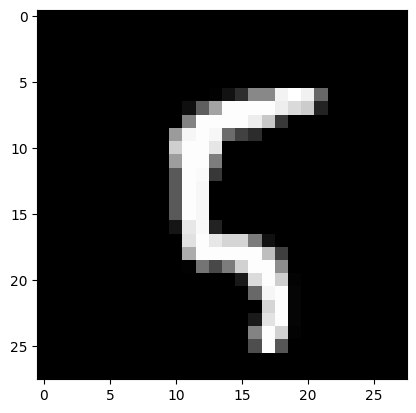

In [8]:
plt.imshow(x_train[100], cmap='gray')
plt.show()

In [9]:
print(x_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [10]:
# Normalize the data from x_train and x_test
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

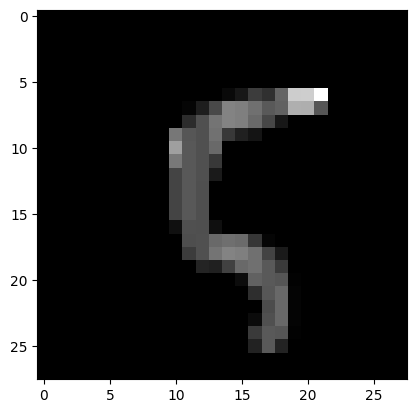

In [11]:
plt.imshow(x_train[100], cmap='gray')
plt.show()

In [12]:
print(x_train[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
# Import sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [14]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8707 - loss: 0.4564
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9655 - loss: 0.1107
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9791 - loss: 0.0700


In [16]:
# Test loss and accuracy of model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1047
0.09279225766658783 0.9702000021934509


In [17]:
model.save('/content/drive/MyDrive/ML_DL_Models/handwritten.keras')

In [18]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/ML_DL_Models/handwritten.keras')

In [19]:
predictions = new_model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(predictions)

[[9.66507208e-10 1.40482879e-08 1.35698167e-06 ... 9.99991834e-01
  2.59321187e-08 3.53892773e-08]
 [4.44739925e-07 1.20473794e-06 9.99996364e-01 ... 8.64493588e-10
  3.00842345e-07 1.73844029e-11]
 [9.37488892e-07 9.99845743e-01 1.13459810e-05 ... 2.99551466e-05
  4.54507572e-05 5.74589706e-07]
 ...
 [4.12704054e-07 1.72573630e-06 8.79149013e-07 ... 1.17433710e-05
  1.15311304e-04 5.43532769e-05]
 [1.27149463e-06 1.49437103e-08 9.14537210e-08 ... 3.85639368e-07
  3.73389979e-04 1.45469805e-08]
 [5.14895895e-08 1.94552774e-09 8.33230551e-09 ... 3.12358321e-13
  8.43782733e-09 1.08694104e-11]]


In [21]:
predictions[0]

array([9.6650721e-10, 1.4048288e-08, 1.3569817e-06, 6.7070769e-06,
       1.0715878e-10, 4.3095017e-08, 3.7347997e-13, 9.9999183e-01,
       2.5932119e-08, 3.5389277e-08], dtype=float32)

In [22]:
np.argmax(predictions[0])

7

In [23]:
outputs = []
for prediction in predictions:
  outputs.append(np.argmax(prediction))

In [24]:
outputs[0], outputs[100]

(7, 6)

In [25]:
x_test.shape

(10000, 28, 28)

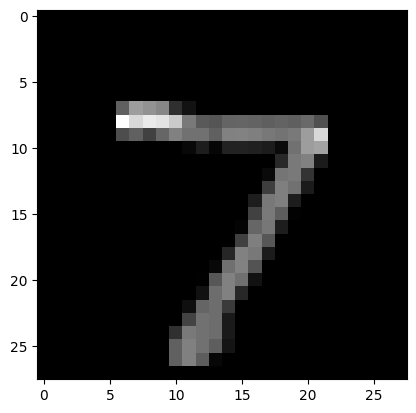

In [26]:
plt.imshow(x_test[0], cmap='grey')

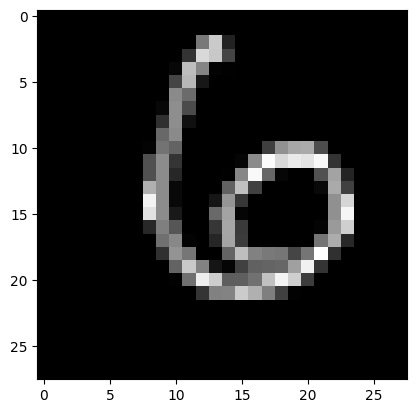

In [27]:
plt.imshow(x_test[100], cmap='gray')